# Advection
## 1D linear advection
$$
    \frac{\partial q}{\partial t}+c\frac{\partial q}{\partial x} = 0.
$$

In [2]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from code_nm_calculus import nm

In [12]:
L    = 10
N    = 400
Tlen = 100
X    = np.linspace(-L,L,N+1)[0:-1]
Dx   = X[1]-X[0]
Dt   = 0.1*Dx
T    = np.arange(0,Tlen+Dt,Dt)
c    = 0.2

In [21]:
Q      = np.zeros((len(T),len(X)))
Q[0,:] = np.exp(-5*X**2)

def fFft(t,Q):
    Y = -c*nm.NDiffFft(X,Q)
    return Y

for i in range (len(T)-1):
    Q[i+1,:] = nm.NIntgRk4(T,Q[i,:],Dt,fFft)

No handles with labels found to put in legend.


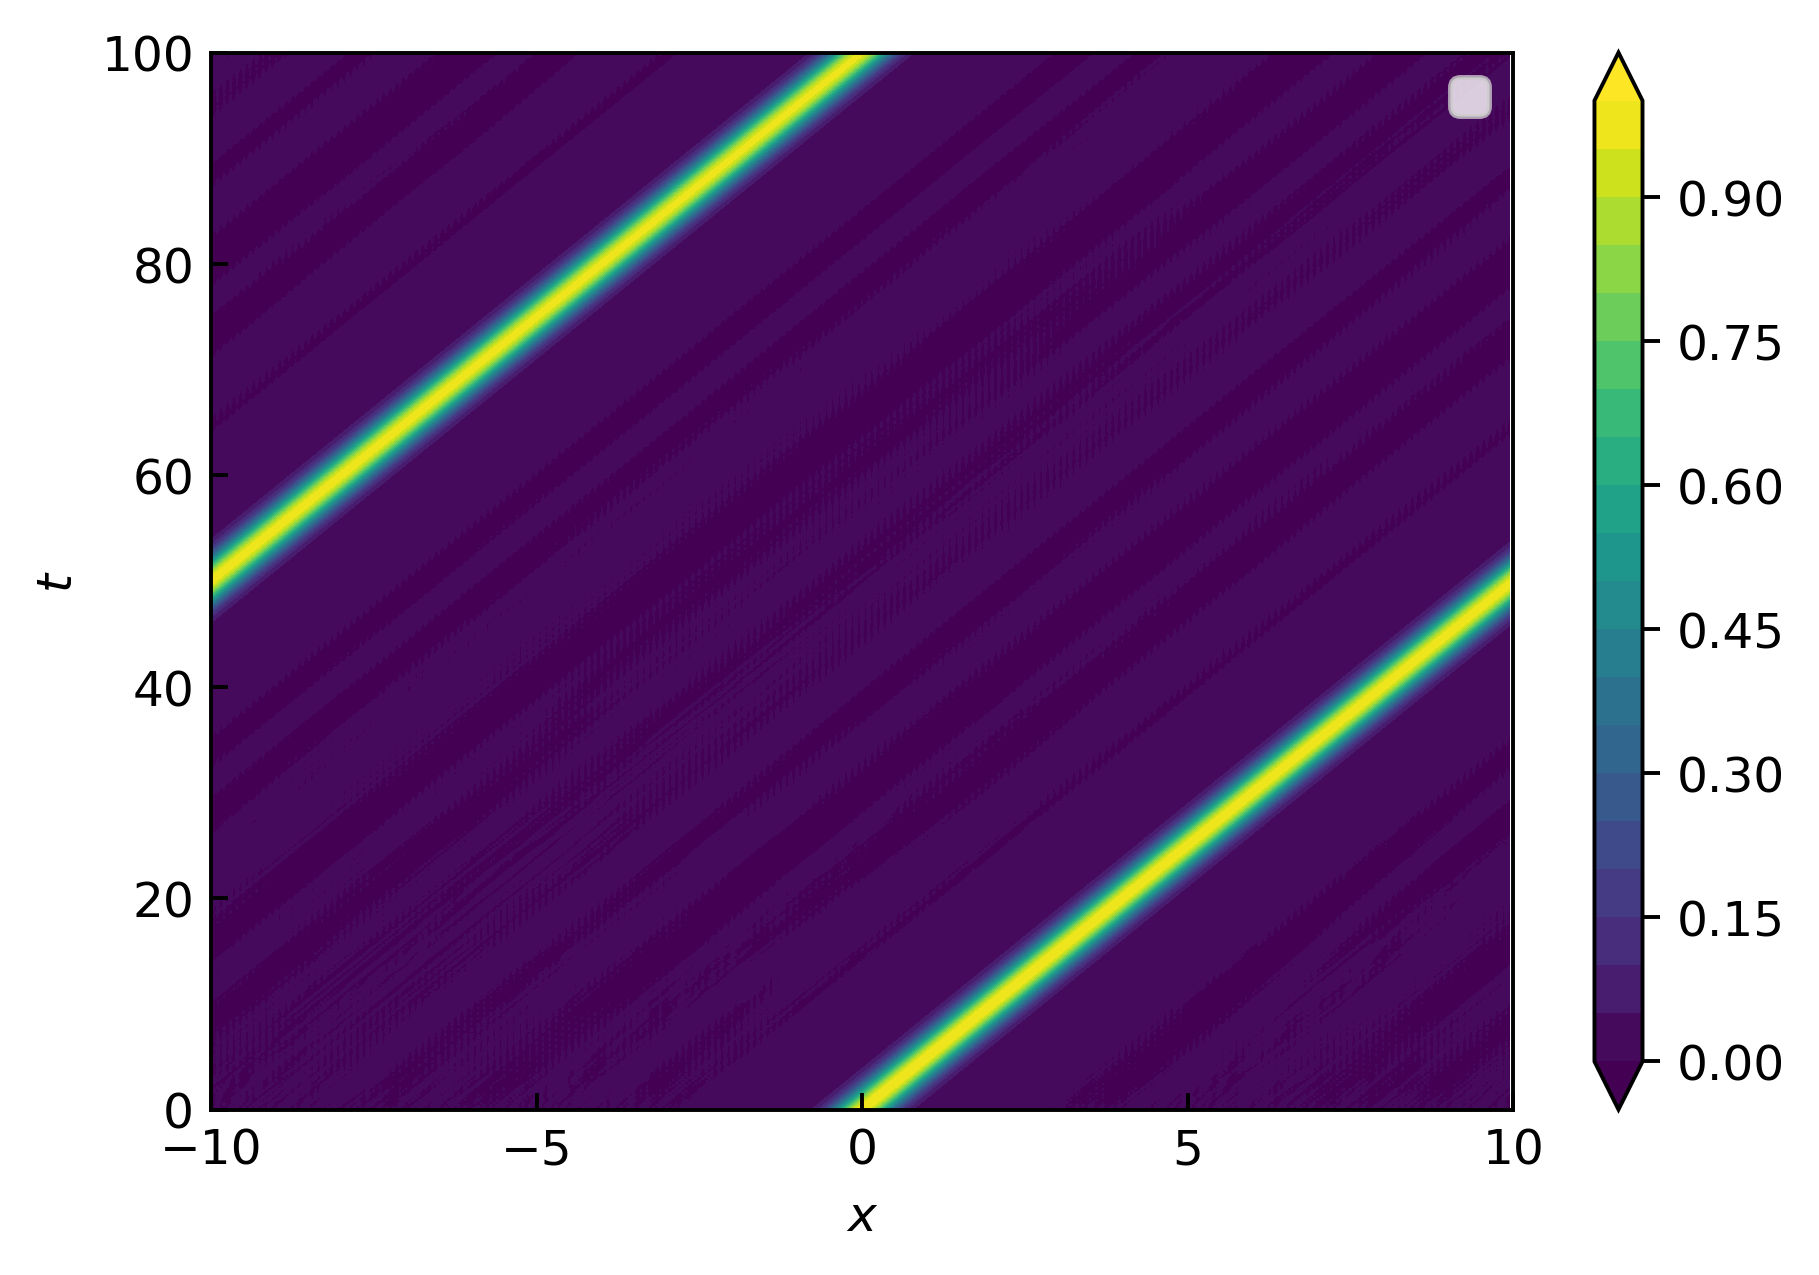

In [37]:
plt.figure(dpi=350)
plt.contourf(X,T,Q,levels=np.arange(0,1+0.05,0.05),extend='both')
plt.xlim(min(X),max(X)+Dx)
plt.ylim(min(T),max(T))
plt.xlabel('$x$',fontsize=10)
plt.ylabel('$t$',fontsize=10)
plt.tick_params(direction='in')
plt.colorbar()
plt.show()